# Artificial Neural Network

https://keras.io/getting_started/

### Data Preprocessing :

In [1]:
# Importing the libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Churn_data.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# as we dont need the features like RowNumber	CustomerId	Surnam.
# iam dropping those features 
df = df.drop(["RowNumber","CustomerId","Surname"],axis=1)

In [4]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
#Dividing data into x and y
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

### One-hot encoding 

In [6]:
#Create dummy variables 
Geography = pd.get_dummies(x["Geography"],drop_first=True)
Gender = pd.get_dummies(x["Gender"],drop_first=True)

In [7]:
#Concatenate the Data Frames
x = pd.concat([x,Geography,Gender],axis=1)
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1,0


In [8]:
#Dropping unnessary columns 
x = x.drop(["Geography","Gender"],axis=1)

In [9]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [10]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=5)

In [11]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [12]:
x_train

array([[-1.44395693e+00,  2.27797473e+00,  1.04411743e+00, ...,
        -5.85268586e-01, -5.72071527e-01,  9.07409229e-01],
       [-4.13114515e-01,  5.72265460e-01, -6.93265378e-01, ...,
        -5.85268586e-01,  1.74803316e+00, -1.10203860e+00],
       [-1.68105068e+00,  2.08845148e+00,  1.68774330e-03, ...,
         1.70861725e+00, -5.72071527e-01, -1.10203860e+00],
       ...,
       [-6.91441966e-01, -7.54397306e-01, -3.45788818e-01, ...,
        -5.85268586e-01, -5.72071527e-01, -1.10203860e+00],
       [ 2.98166750e-01, -2.80589175e-01,  3.49164304e-01, ...,
        -5.85268586e-01, -5.72071527e-01,  9.07409229e-01],
       [-1.66043383e+00,  1.23559684e+00, -1.38821850e+00, ...,
         1.70861725e+00, -5.72071527e-01, -1.10203860e+00]])

In [13]:
x_test

array([[ 1.22566172, -0.08036346,  0.32349206, ..., -0.56349184,
         1.73051257,  0.92419744],
       [-1.22747112, -0.46750174,  0.66544983, ..., -0.56349184,
        -0.57786347, -1.08201987],
       [ 0.80810719, -0.46750174,  1.34936539, ..., -0.56349184,
        -0.57786347, -1.08201987],
       ...,
       [ 2.07120963, -0.75785546, -1.38629683, ..., -0.56349184,
        -0.57786347,  0.92419744],
       [-0.24621799, -1.33856289,  0.66544983, ..., -0.56349184,
        -0.57786347,  0.92419744],
       [ 0.86030151, -0.17714803, -0.70238127, ..., -0.56349184,
        -0.57786347,  0.92419744]])

# Creating ANN

In [14]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [15]:
# Initialising the ANN
# this is an empty nueral network
classifier = Sequential()

In [16]:
#with respect to keras 1.0 this is syntax
classifier.add(Dense(output_dim = 6,init = 'he_uniform',activation='relu',input_dim = 11))

TypeError: __init__() missing 1 required positional argument: 'units'

In [17]:
# output_dim = 6 means iam going to consider 6 neurons
# init = 'he_uniform' means how wiegts need to intilize.
#input_dim is 11 because we are giving 11 inputs to that neuron

In [18]:
#after keras 1.0 
# output_dim  parameter changed to "units"
# init parameter changed to "kernel_initializer"
classifier.add(Dense(units = 6,kernel_initializer='he_uniform',activation='relu',input_dim = 11))

In [19]:
# Adding the second hidden layer
classifier.add(Dense(units = 6,kernel_initializer='he_uniform',activation='relu'))

In [20]:
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

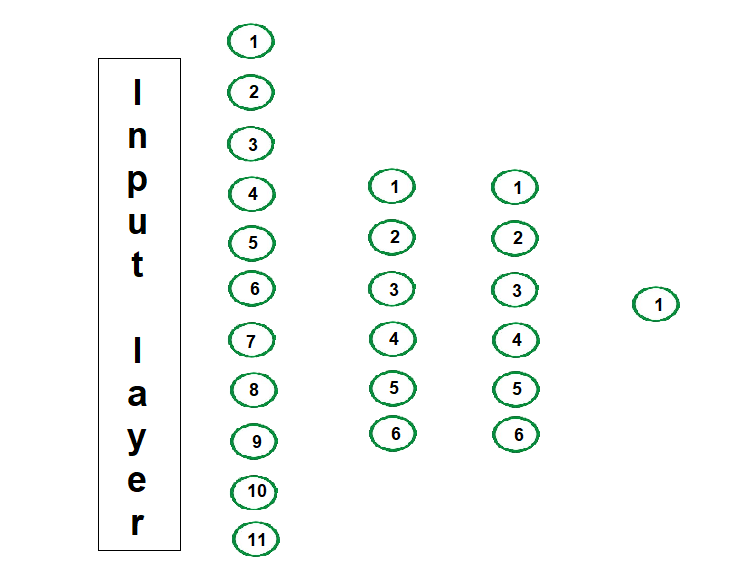

After adding two hidden layers and later we will do hyper optimizer technique to how many actually can i use hidden layers.

As of now we are just intilizing 2 hidden layers.later we will find how many layer should i take.

In [21]:
#to get summary about your nueral network
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 72        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [22]:
# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [23]:
# we are using "Adamax" as our optimizer.
# and it better to use loss as "binary_crossentropy" for binary class classification
# where as "categorical_crossentropy" use for multclass classification

In [24]:
# Fitting the ANN to the Training set
model_history=classifier.fit(x_train, y_train,validation_split=0.33, batch_size = 10, epochs = 100)

Epoch 1/100
469/469 [==============================] - 2s 3ms/step - loss: 0.5745 - accuracy: 0.7867 - val_loss: 0.5203 - val_accuracy: 0.7992
Epoch 2/100
469/469 [==============================] - 1s 2ms/step - loss: 0.5101 - accuracy: 0.7919 - val_loss: 0.4864 - val_accuracy: 0.7992
Epoch 3/100
469/469 [==============================] - 1s 2ms/step - loss: 0.4899 - accuracy: 0.7919 - val_loss: 0.4758 - val_accuracy: 0.7992
Epoch 4/100
469/469 [==============================] - 1s 2ms/step - loss: 0.4810 - accuracy: 0.7919 - val_loss: 0.4697 - val_accuracy: 0.7992
Epoch 5/100
469/469 [==============================] - 1s 2ms/step - loss: 0.4753 - accuracy: 0.7919 - val_loss: 0.4655 - val_accuracy: 0.7992
Epoch 6/100
469/469 [==============================] - 1s 2ms/step - loss: 0.4707 - accuracy: 0.7919 - val_loss: 0.4622 - val_accuracy: 0.7992
Epoch 7/100
469/469 [==============================] - 1s 2ms/step - loss: 0.4668 - accuracy: 0.7919 - val_loss: 0.4593 - val_accuracy: 0.7992

Epoch 58/100
469/469 [==============================] - 1s 2ms/step - loss: 0.4081 - accuracy: 0.8279 - val_loss: 0.4093 - val_accuracy: 0.8334
Epoch 59/100
469/469 [==============================] - 1s 2ms/step - loss: 0.4077 - accuracy: 0.8281 - val_loss: 0.4086 - val_accuracy: 0.8325
Epoch 60/100
469/469 [==============================] - 1s 2ms/step - loss: 0.4072 - accuracy: 0.8279 - val_loss: 0.4082 - val_accuracy: 0.8330
Epoch 61/100
469/469 [==============================] - 1s 2ms/step - loss: 0.4067 - accuracy: 0.8281 - val_loss: 0.4078 - val_accuracy: 0.8325
Epoch 62/100
469/469 [==============================] - 1s 2ms/step - loss: 0.4064 - accuracy: 0.8285 - val_loss: 0.4074 - val_accuracy: 0.8325
Epoch 63/100
469/469 [==============================] - 1s 2ms/step - loss: 0.4061 - accuracy: 0.8298 - val_loss: 0.4070 - val_accuracy: 0.8321
Epoch 64/100
469/469 [==============================] - 1s 2ms/step - loss: 0.4057 - accuracy: 0.8292 - val_loss: 0.4067 - val_accuracy:

In [48]:
# Predicting the Test set results
y_pred = classifier.predict(x_test)

94/94 [==============================] - 0s 1ms/step


In [26]:
y_pred = (y_pred > 0.5) 

In [27]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [28]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [29]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [30]:
score

0.834

#### Other way to find accuracy:

In [31]:
y_pred_new = [ 1 if i>0.5 else 0  for i in y_pred]

In [32]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [33]:
cm

array([[2306,   97],
       [ 401,  196]], dtype=int64)

In [34]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred_new,y_test)

In [35]:
score

0.834

# Trying Other neural network 
* with one more hidden layer and 
* different no of neurons and 
* with he_normal as weights intilization tech

In [36]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [37]:
# Initialising the ANN
# this is an empty nueral network
classifier2 = Sequential()

In [38]:
# Adding the input layer and the first hidden layer
#added newly is units = 10 and kernel_initializer='he_normal'
classifier2.add(Dense(units = 10,kernel_initializer='he_normal',activation='relu',input_dim = 11))

In [39]:
# Adding the 2rd hidden layer
#added newly is units = 20 and kernel_initializer='he_normal'
classifier2.add(Dense(units = 20,kernel_initializer='he_normal',activation='relu',input_dim = 11))

In [40]:
# Adding the 2rd hidden layer
#added newly is units = 15 and kernel_initializer='he_normal'
classifier2.add(Dense(units = 15,kernel_initializer='he_normal',activation='relu',input_dim = 11))

In [50]:
# Adding the output layer
classifier2.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

In [51]:
#to get summary about your nueral network
classifier2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                120       
                                                                 
 dense_4 (Dense)             (None, 20)                220       
                                                                 
 dense_5 (Dense)             (None, 15)                315       
                                                                 
 dense_6 (Dense)             (None, 1)                 16        
                                                                 
Total params: 671
Trainable params: 671
Non-trainable params: 0
_________________________________________________________________


In [52]:
# Compiling the ANN
classifier2.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [53]:
# Fitting the ANN to the Training set
model_history=classifier2.fit(x_train, y_train,validation_split=0.33, batch_size = 10, epochs = 100)

Epoch 1/100
469/469 [==============================] - 3s 4ms/step - loss: 0.5440 - accuracy: 0.7863 - val_loss: 0.4914 - val_accuracy: 0.7992
Epoch 2/100
469/469 [==============================] - 1s 3ms/step - loss: 0.4794 - accuracy: 0.7959 - val_loss: 0.4569 - val_accuracy: 0.8100
Epoch 3/100
469/469 [==============================] - 1s 2ms/step - loss: 0.4555 - accuracy: 0.8053 - val_loss: 0.4405 - val_accuracy: 0.8187
Epoch 4/100
469/469 [==============================] - 1s 3ms/step - loss: 0.4438 - accuracy: 0.8102 - val_loss: 0.4317 - val_accuracy: 0.8252
Epoch 5/100
469/469 [==============================] - 1s 3ms/step - loss: 0.4349 - accuracy: 0.8164 - val_loss: 0.4243 - val_accuracy: 0.8260
Epoch 6/100
469/469 [==============================] - 1s 3ms/step - loss: 0.4286 - accuracy: 0.8185 - val_loss: 0.4166 - val_accuracy: 0.8334
Epoch 7/100
469/469 [==============================] - 1s 2ms/step - loss: 0.4207 - accuracy: 0.8209 - val_loss: 0.4104 - val_accuracy: 0.8373

Epoch 58/100
469/469 [==============================] - 2s 3ms/step - loss: 0.3331 - accuracy: 0.8620 - val_loss: 0.3393 - val_accuracy: 0.8663
Epoch 59/100
469/469 [==============================] - 2s 3ms/step - loss: 0.3330 - accuracy: 0.8620 - val_loss: 0.3389 - val_accuracy: 0.8689
Epoch 60/100
469/469 [==============================] - 2s 3ms/step - loss: 0.3321 - accuracy: 0.8601 - val_loss: 0.3406 - val_accuracy: 0.8672
Epoch 61/100
469/469 [==============================] - 2s 3ms/step - loss: 0.3321 - accuracy: 0.8624 - val_loss: 0.3393 - val_accuracy: 0.8685
Epoch 62/100
469/469 [==============================] - 2s 4ms/step - loss: 0.3318 - accuracy: 0.8618 - val_loss: 0.3384 - val_accuracy: 0.8706
Epoch 63/100
469/469 [==============================] - 2s 4ms/step - loss: 0.3314 - accuracy: 0.8618 - val_loss: 0.3376 - val_accuracy: 0.8680
Epoch 64/100
469/469 [==============================] - 1s 3ms/step - loss: 0.3315 - accuracy: 0.8618 - val_loss: 0.3375 - val_accuracy:

In [60]:
y_new_pred = classifier2.predict(x_test)

94/94 [==============================] - 0s 2ms/step


In [62]:
y_new_pred

array([[0.0299222 ],
       [0.02599549],
       [0.06263547],
       ...,
       [0.0852984 ],
       [0.01223585],
       [0.04570496]], dtype=float32)

In [63]:
y_new_pred = (y_new_pred > 0.5)

In [64]:
y_new_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [67]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_new_pred)
cm

array([[2282,  121],
       [ 330,  267]], dtype=int64)

In [68]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred_new,y_test)
score

0.8496666666666667

#### Note :
* Almost we got same accuracy as we got before.
* but dont increse the no of hidden layers it may cause to over fitting problem

# By using dropout :
* Dropout is regulization parameter that we can use when we have nn quite deep}

In [69]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [70]:
# Initialising the ANN
# this is an empty nueral network
classifier = Sequential()

In [71]:
# Adding the input layer and the first hidden layer
#added newly is units = 10 and kernel_initializer='he_normal'
classifier.add(Dense(units = 10,kernel_initializer='he_normal',activation='relu',input_dim = 11))
classifier.add(Dropout(0.3))

In [72]:
# Adding the 2rd hidden layer
#added newly is units = 20 and kernel_initializer='he_normal'
classifier.add(Dense(units = 20,kernel_initializer='he_normal',activation='relu',input_dim = 11))
classifier.add(Dropout(0.4))

In [73]:
# Adding the 2rd hidden layer
#added newly is units = 15 and kernel_initializer='he_normal'
classifier.add(Dense(units = 15,kernel_initializer='he_normal',activation='relu',input_dim = 11))
classifier.add(Dropout(0.2))

In [75]:
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

In [76]:
#to get summary about your nueral network
classifier.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 10)                120       
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense_8 (Dense)             (None, 20)                220       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_9 (Dense)             (None, 15)                315       
                                                                 
 dropout_2 (Dropout)         (None, 15)                0         
                                                                 
 dense_10 (Dense)            (None, 1)                

In [77]:
# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [78]:
# Fitting the ANN to the Training set
model_history=classifier.fit(x_train, y_train,validation_split=0.33, batch_size = 10, epochs = 100)

Epoch 1/100
469/469 [==============================] - 2s 3ms/step - loss: 0.6432 - accuracy: 0.7370 - val_loss: 0.5123 - val_accuracy: 0.7992
Epoch 2/100
469/469 [==============================] - 2s 3ms/step - loss: 0.5809 - accuracy: 0.7660 - val_loss: 0.4999 - val_accuracy: 0.7992
Epoch 3/100
469/469 [==============================] - 1s 3ms/step - loss: 0.5613 - accuracy: 0.7739 - val_loss: 0.4900 - val_accuracy: 0.8014
Epoch 4/100
469/469 [==============================] - 1s 3ms/step - loss: 0.5376 - accuracy: 0.7823 - val_loss: 0.4832 - val_accuracy: 0.8035
Epoch 5/100
469/469 [==============================] - 1s 3ms/step - loss: 0.5242 - accuracy: 0.7857 - val_loss: 0.4767 - val_accuracy: 0.8031
Epoch 6/100
469/469 [==============================] - 1s 3ms/step - loss: 0.5228 - accuracy: 0.7852 - val_loss: 0.4745 - val_accuracy: 0.8023
Epoch 7/100
469/469 [==============================] - 1s 3ms/step - loss: 0.5102 - accuracy: 0.7884 - val_loss: 0.4688 - val_accuracy: 0.8031

Epoch 58/100
469/469 [==============================] - 1s 2ms/step - loss: 0.4478 - accuracy: 0.7976 - val_loss: 0.4232 - val_accuracy: 0.8131
Epoch 59/100
469/469 [==============================] - 1s 3ms/step - loss: 0.4418 - accuracy: 0.7995 - val_loss: 0.4224 - val_accuracy: 0.8126
Epoch 60/100
469/469 [==============================] - 2s 4ms/step - loss: 0.4485 - accuracy: 0.8002 - val_loss: 0.4224 - val_accuracy: 0.8135
Epoch 61/100
469/469 [==============================] - 2s 4ms/step - loss: 0.4470 - accuracy: 0.7987 - val_loss: 0.4223 - val_accuracy: 0.8126
Epoch 62/100
469/469 [==============================] - 2s 3ms/step - loss: 0.4468 - accuracy: 0.7976 - val_loss: 0.4222 - val_accuracy: 0.8131
Epoch 63/100
469/469 [==============================] - 1s 3ms/step - loss: 0.4400 - accuracy: 0.8004 - val_loss: 0.4205 - val_accuracy: 0.8131
Epoch 64/100
469/469 [==============================] - 2s 3ms/step - loss: 0.4449 - accuracy: 0.8021 - val_loss: 0.4195 - val_accuracy:

In [79]:
# Predicting the Test set results
y_pred = classifier.predict(x_test)
y_pred = (y_pred > 0.5)

94/94 [==============================] - 0s 1ms/step


In [80]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [83]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[2381,   22],
       [ 482,  115]], dtype=int64)

In [84]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred_new,y_test)
score

0.8496666666666667

#### Note :
* We mostly use dropout when we have more deep in neural network>

#### Note :
* Here we have taken hidden layers as randmoly 
* but we use some <b>techniques hyper parametimization</b> optimizer technique to get correct number of layers.